In [83]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

In [84]:
khv_genome_ids = ['HG02069', 'HG01846', 'HG02078', 'HG01851', 'HG01865', 'HG01862', 'HG02137', 'HG02050', 'HG02019', 'HG02029', 'HG02522', 'HG01850', 'HG02072', 'HG02139', 'HG02058', 'HG02081', 'HG01858', 'HG01867', 'HG02032', 'HG02122', 'HG01860', 'HG02016', 'HG01869', 'HG02061', 'HG02084', 'HG01852', 'HG02026', 'HG02521', 'HG01848', 'HG02130', 'HG02140', 'HG02113', 'HG02075', 'HG01598', 'HG02047', 'HG02121', 'HG01599', 'HG02136', 'HG01863', 'HG01874', 'HG02138', 'HG02025', 'HG01844', 'HG01845', 'HG02049', 'HG01870', 'HG02133', 'HG02088', 'HG02028', 'HG02076', 'HG01842', 'HG02023', 'HG02142', 'HG02035', 'HG02085', 'HG02086', 'HG02513', 'HG01873', 'HG02134', 'HG01871', 'HG01600', 'HG01868', 'HG02060', 'HG01878', 'HG02020', 'HG02127', 'HG01864', 'HG01595', 'HG02048', 'HG01847', 'HG01859', 'HG01861', 'HG01849', 'HG01843', 'HG02031', 'HG02512', 'HG01857', 'HG01853', 'HG02082', 'HG02073', 'HG02128', 'HG01855', 'HG02064', 'HG02040', 'HG02087', 'HG01597', 'HG02079', 'HG01872', 'HG02070', 'HG02131', 'HG02017', 'HG01866', 'HG02116', 'HG01840', 'HG01841', 'HG01596', 'HG02141', 'HG02067', 'HG02057']

In [85]:
gbr_genome_ids = ['HG00231', 'HG00129', 'HG00251', 'HG00118', 'HG00134', 'HG00100', 'HG00097', 'HG00128', 'HG02215', 'HG00146', 'HG00249', 'HG00256', 'HG00103', 'HG00243', 'HG00157', 'HG01789', 'HG00120', 'HG00139', 'HG00109', 'HG00254', 'HG00250', 'HG00135', 'HG00236', 'HG00126', 'HG00148', 'HG00150', 'HG00160', 'HG00143', 'HG00108', 'HG00155', 'HG00232', 'HG00115', 'HG00142', 'HG00239', 'HG00233', 'HG00113', 'HG00260', 'HG00257', 'HG00158', 'HG00252', 'HG00253', 'HG00114', 'HG00238', 'HG00246', 'HG00117', 'HG00096', 'HG00104', 'HG00262', 'HG00119', 'HG00121', 'HG00133', 'HG00130', 'HG00259', 'HG00140', 'HG00141', 'HG00240', 'HG00123', 'HG00156', 'HG00255', 'HG00263', 'HG00105', 'HG00110', 'HG00235', 'HG01334', 'HG00107', 'HG00131', 'HG00138', 'HG00152', 'HG00245', 'HG00159', 'HG00099', 'HG00264', 'HG00137', 'HG00116', 'HG00122', 'HG00234', 'HG00125', 'HG00111', 'HG00261', 'HG01791', 'HG00101', 'HG00149', 'HG00136', 'HG00244', 'HG01790', 'HG00132', 'HG00102', 'HG00154', 'HG00258', 'HG00106', 'HG00112', 'HG00265', 'HG00151', 'HG00237', 'HG00127', 'HG00145']


In [86]:
chb_genome_ids = ['NA18605', 'NA18573', 'NA18627', 'NA18747', 'NA18616', 'NA18596', 'NA18552', 'NA18648', 'NA18626', 'NA18619', 'NA18612', 'NA18565', 'NA18530', 'NA18570', 'NA18740', 'NA18602', 'NA18611', 'NA18577', 'NA18609', 'NA18576', 'NA18597', 'NA18610', 'NA18582', 'NA18553', 'NA18608', 'NA18592', 'NA18635', 'NA18645', 'NA18533', 'NA18574', 'NA18539', 'NA18757', 'NA18636', 'NA18638', 'NA18615', 'NA18613', 'NA18625', 'NA18591', 'NA18527', 'NA18562', 'NA18531', 'NA18542', 'NA18559', 'NA18634', 'NA18632', 'NA18528', 'NA18564', 'NA18560', 'NA18642', 'NA18534', 'NA18547', 'NA18628', 'NA18639', 'NA18557', 'NA18545', 'NA18599', 'NA18561', 'NA18532', 'NA18641', 'NA18631', 'NA18536', 'NA18550', 'NA18748', 'NA18630', 'NA18617', 'NA18546', 'NA18629', 'NA18579', 'NA18538', 'NA18593', 'NA18526', 'NA18745', 'NA18541', 'NA18548', 'NA18620', 'NA18614', 'NA18621', 'NA18623', 'NA18571', 'NA18606', 'NA18525', 'NA18637', 'NA18572', 'NA18567', 'NA18549', 'NA18624', 'NA18563', 'NA18603', 'NA18622', 'NA18555', 'NA18749', 'NA18543', 'NA18544', 'NA18537', 'NA18640', 'NA18618', 'NA18595', 'NA18633', 'NA18643', 'NA18535', 'NA18558', 'NA18647']

In [87]:
fin_genome_ids = ['HG00349', 'HG00327', 'HG00266', 'HG00323', 'HG00368', 'HG00326', 'HG00270', 'HG00321', 'HG00337', 'HG00189', 'HG00272', 'HG00382', 'HG00364', 'HG00304', 'HG00339', 'HG00330', 'HG00355', 'HG00186', 'HG00308', 'HG00353', 'HG00285', 'HG00273', 'HG00371', 'HG00274', 'HG00375', 'HG00282', 'HG00346', 'HG00345', 'HG00325', 'HG00367', 'HG00183', 'HG00366', 'HG00358', 'HG00275', 'HG00177', 'HG00178', 'HG00338', 'HG00319', 'HG00311', 'HG00381', 'HG00334', 'HG00277', 'HG00369', 'HG00324', 'HG00267', 'HG00372', 'HG00342', 'HG00284', 'HG00190', 'HG00181', 'HG00356', 'HG00180', 'HG00176', 'HG00271', 'HG00362', 'HG00288', 'HG00384', 'HG00182', 'HG00376', 'HG00336', 'HG00350', 'HG00318', 'HG00188', 'HG00344', 'HG00315', 'HG00269', 'HG00335', 'HG00179', 'HG00377', 'HG00185', 'HG00359', 'HG00383', 'HG00380', 'HG00276', 'HG00268', 'HG00332', 'HG00278', 'HG00365', 'HG00281', 'HG00343', 'HG00351', 'HG00187', 'HG00373', 'HG00320', 'HG00310', 'HG00171', 'HG00313', 'HG00357', 'HG00361', 'HG00379', 'HG00378', 'HG00309', 'HG00328', 'HG00290', 'HG00331', 'HG00329', 'HG00174', 'HG00312', 'HG00306', 'HG00341', 'HG00360', 'HG00280', 'HG00173']

In [88]:
root_dir = join(Path.home(), "cp_als/populations")

In [89]:
khv_infile = join(root_dir, "output/KHV/all.csv")
gbr_infile = join(root_dir, "output/GBR/all.csv")
chb_infile = join(root_dir, "output/CHB/all.csv")
fin_infile = join(root_dir, "output/FIN/all.csv")

In [90]:
khv_df = pd.read_csv(khv_infile)
gbr_df = pd.read_csv(gbr_infile)
chb_df = pd.read_csv(chb_infile)
fin_df = pd.read_csv(fin_infile)

In [91]:
khv_df = khv_df[khv_genome_ids + ["gene"]]
gbr_df = gbr_df[gbr_genome_ids + ["gene"]]
chb_df = chb_df[chb_genome_ids + ["gene"]]
fin_df = fin_df[fin_genome_ids + ["gene"]]

In [92]:
khv_df.head()

,HG02069,HG01846,HG02078,HG01851,HG01865,HG01862,HG02137,HG02050,HG02019,HG02029,...,HG02017,HG01866,HG02116,HG01840,HG01841,HG01596,HG02141,HG02067,HG02057,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,TARDBP
4,0,0,0,0,1,0,1,1,1,0,...,1,1,0,0,0,0,0,0,0,TARDBP


In [93]:
gbr_df.head()

,HG00231,HG00129,HG00251,HG00118,HG00134,HG00100,HG00097,HG00128,HG02215,HG00146,...,HG00154,HG00258,HG00106,HG00112,HG00265,HG00151,HG00237,HG00127,HG00145,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,TARDBP
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,TARDBP


In [94]:
chb_df.head()

,NA18605,NA18573,NA18627,NA18747,NA18616,NA18596,NA18552,NA18648,NA18626,NA18619,...,NA18537,NA18640,NA18618,NA18595,NA18633,NA18643,NA18535,NA18558,NA18647,gene
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
4,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,TARDBP


In [95]:
fin_df.head()

,HG00349,HG00327,HG00266,HG00323,HG00368,HG00326,HG00270,HG00321,HG00337,HG00189,...,HG00331,HG00329,HG00174,HG00312,HG00306,HG00341,HG00360,HG00280,HG00173,gene
0,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,TARDBP
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP


In [96]:
gbr_df.shape, khv_df.shape, chb_df.shape, chb_df.shape

((9036, 97), (8656, 100), (8072, 103), (8072, 103))

In [97]:
c_khvdf = pd.DataFrame(khv_df.groupby(["gene"]).sum())
c_gbrdf = pd.DataFrame(gbr_df.groupby(["gene"]).sum())
c_chbdf = pd.DataFrame(chb_df.groupby(["gene"]).sum())
c_findf = pd.DataFrame(fin_df.groupby(["gene"]).sum())

In [98]:
c_khvdf.transpose().head()

gene,ALS2,ANG,ATXN2,C19ORF12,C9ORF72,CHCHD10,CHMP2B,CHRNA3,CREST,DAO,...,SOD1,SPG11,SQSTM1,TAF15,TARDBP,TUBA4A,VAPB,VCP,hnRNPA2B1,hnRNPa1
HG02069,4,0,6,11,14,1,14,23,103,3,...,0,50,15,36,0,0,38,1,0,0
HG01846,20,1,4,5,23,0,4,24,3,1,...,0,60,9,0,1,0,35,13,1,0
HG02078,2,0,4,1,15,1,8,16,4,8,...,0,58,10,2,1,0,25,1,7,0
HG01851,7,6,7,13,12,2,7,28,1,6,...,0,2,6,1,3,0,59,8,1,0
HG01865,24,8,12,11,11,1,1,19,88,2,...,0,93,9,2,5,0,17,0,7,1


In [99]:
c_gbrdf.transpose().head()

gene,ALS2,ANG,ATXN2,C19ORF12,C9ORF72,CHCHD10,CHMP2B,CHRNA3,CREST,DAO,...,SOD1,SPG11,SQSTM1,TAF15,TARDBP,TUBA4A,VAPB,VCP,hnRNPA2B1,hnRNPa1
HG00231,17,0,12,10,34,1,14,23,90,2,...,0,6,5,25,8,0,13,5,11,1
HG00129,5,0,15,8,35,1,0,22,6,2,...,0,5,11,12,1,0,1,5,1,0
HG00251,4,4,10,8,10,1,15,22,2,2,...,0,8,4,0,0,3,25,1,2,0
HG00118,34,0,15,8,45,2,12,17,3,2,...,0,4,3,26,0,0,16,6,2,0
HG00134,19,9,9,7,22,2,11,14,2,2,...,2,5,12,3,1,0,54,12,1,0


In [100]:
c_chbdf.transpose().head()

gene,ALS2,ANG,ATXN2,C19ORF12,C9ORF72,CHCHD10,CHMP2B,CHRNA3,CREST,DAO,...,SOD1,SPG11,SQSTM1,TAF15,TARDBP,TUBA4A,VAPB,VCP,hnRNPA2B1,hnRNPa1
NA18605,7,0,7,10,1,0,17,6,92,2,...,2,7,9,0,5,0,23,1,2,0
NA18573,20,0,7,10,34,0,12,15,86,4,...,0,5,5,1,0,0,20,0,7,1
NA18627,21,5,5,5,15,1,15,25,3,3,...,0,92,20,1,4,4,17,0,3,1
NA18747,24,13,3,4,23,1,10,23,0,4,...,1,4,14,25,6,0,22,0,0,0
NA18616,4,1,3,6,12,1,14,39,86,2,...,0,87,8,18,0,0,16,0,4,0


In [101]:
df = pd.concat([c_khvdf.transpose(), c_gbrdf.transpose(), c_chbdf.transpose(), c_findf.transpose()])

In [102]:
df.head()

gene,ALS2,ANG,ATXN2,C19ORF12,C9ORF72,CHCHD10,CHMP2B,CHRNA3,CREST,DAO,...,SOD1,SPG11,SQSTM1,TAF15,TARDBP,TUBA4A,VAPB,VCP,hnRNPA2B1,hnRNPa1
HG02069,4,0,6,11,14,1,14,23,103,3,...,0,50,15,36,0,0,38,1,0,0
HG01846,20,1,4,5,23,0,4,24,3,1,...,0,60,9,0,1,0,35,13,1,0
HG02078,2,0,4,1,15,1,8,16,4,8,...,0,58,10,2,1,0,25,1,7,0
HG01851,7,6,7,13,12,2,7,28,1,6,...,0,2,6,1,3,0,59,8,1,0
HG01865,24,8,12,11,11,1,1,19,88,2,...,0,93,9,2,5,0,17,0,7,1


In [103]:
df.index

Index(['HG02069', 'HG01846', 'HG02078', 'HG01851', 'HG01865', 'HG01862',
       'HG02137', 'HG02050', 'HG02019', 'HG02029',
       ...
       'HG00290', 'HG00331', 'HG00329', 'HG00174', 'HG00312', 'HG00306',
       'HG00341', 'HG00360', 'HG00280', 'HG00173'],
      dtype='object', length=400)

In [104]:
df.shape

(400, 36)

In [105]:
df.columns

Index(['ALS2', 'ANG', 'ATXN2', 'C19ORF12', 'C9ORF72', 'CHCHD10', 'CHMP2B',
       'CHRNA3', 'CREST', 'DAO', 'DCTN1', 'ELP3', 'ERBB4', 'EWSR1', 'FIG4',
       'FUS', 'MATR3', 'NEFH', 'NEK1', 'OPTN', 'PFN1', 'PNPLA6', 'PON1-3',
       'PRPH', 'SETX', 'SIGMAR1', 'SOD1', 'SPG11', 'SQSTM1', 'TAF15', 'TARDBP',
       'TUBA4A', 'VAPB', 'VCP', 'hnRNPA2B1', 'hnRNPa1'],
      dtype='object', name='gene')

In [106]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [107]:
# Step 2: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [108]:
df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]


In [109]:
df.head()

gene,ALS2,ANG,ATXN2,C19ORF12,C9ORF72,CHCHD10,CHMP2B,CHRNA3,CREST,DAO,...,SQSTM1,TAF15,TARDBP,TUBA4A,VAPB,VCP,hnRNPA2B1,hnRNPa1,PC1,PC2
HG02069,4,0,6,11,14,1,14,23,103,3,...,15,36,0,0,38,1,0,0,-1.064551,-0.382120
HG01846,20,1,4,5,23,0,4,24,3,1,...,9,0,1,0,35,13,1,0,-1.203401,-0.613803
HG02078,2,0,4,1,15,1,8,16,4,8,...,10,2,1,0,25,1,7,0,-1.268237,-2.413405
HG01851,7,6,7,13,12,2,7,28,1,6,...,6,1,3,0,59,8,1,0,-0.329296,-0.778599
HG01865,24,8,12,11,11,1,1,19,88,2,...,9,2,5,0,17,0,7,1,-3.096004,-1.199522


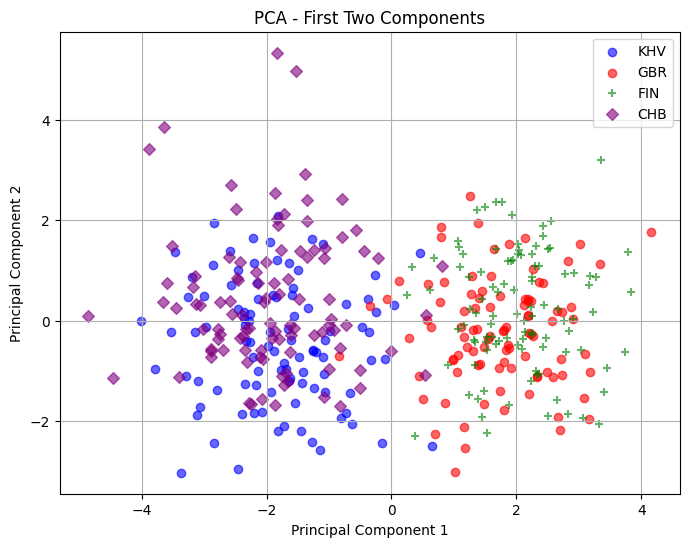

In [110]:
# Step 3: Visualize the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(df.loc[khv_genome_ids]['PC1'], df.loc[khv_genome_ids]['PC2'], c='blue', alpha=0.6, label='KHV', marker='o')
plt.scatter(df.loc[gbr_genome_ids]['PC1'], df.loc[gbr_genome_ids]['PC2'], c='red', alpha=0.6,  label='GBR', marker='o')
plt.scatter(df.loc[fin_genome_ids]['PC1'], df.loc[fin_genome_ids]['PC2'], c='green', alpha=0.6,  label='FIN', marker='+')
plt.scatter(df.loc[chb_genome_ids]['PC1'], df.loc[chb_genome_ids]['PC2'], c='purple', alpha=0.6,  label='CHB', marker='D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA - First Two Components')
plt.grid(True)
plt.show()